# Problems in Avia

#### In this notebook I try to show the problems with flight.

___________________________________________________________________________________________________________________________________________________

### GETTING INFORMATION

First, I load all packages. 

Short description about them and what surely I use in project: 
1. Analysis/table - pandas, numpy
2. Visulisation - matplotlib, basemap
3. Time - datetime

I used the entire database from [here](https://www.kaggle.com/datasets/usdot/flight-delays?datasetId=810&sortBy=voteCount&select=airports.csv)
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import datetime

Read data about airports

In [2]:
airports = pd.read_csv('data/airports.csv')

Read information about flights

In [3]:
df = pd.read_csv('data/flights.csv',  dtype=str)

Read information about airlines

In [4]:
airlines = pd.read_csv('data/airlines.csv')

Have look to our data

In [5]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


That file contains more than *5 million* flight records for 2015. Each flight contains *31 descriptive* features. I will explain only those that I used for analysis.  

1. ГОД, МЕСЯЦ, ДЕНЬ, ДЕНЬ НЕДЕЛИ,
2. AIRLINE - АВИАЛИНИИ, 
3. FLIGHT_NUMBER - НОМЕР ПОЛЕТА, 
4. TAIL_NUMBER - ИДЕНТИФИКАТОР  САМОЛЕТА, 
5. ORIGIN_AIRPORT - АЭРОПОРТ(ОТКУДА),
6. DESTINATION_AIRPORT - АЭРОПОРТ(КУДА),
7. SCHEDULED_DEPARTURE - ЗАПЛАНИРОВАННОЕ ВРЕМЯ ОТПРАВЛЕНИЯ
8. DEPARTURE_DELAY - ОБЩАЯ ЗАДЕРЖКА ОТПРАВЛЕНИЯ(!!!!!!!!)
9. DEPARTURE_TIME - WHEEL_OFF - TAXI_OUT,(ВРЕМЯ ОТПРАВЛЕНИЯ)
10. TAXI_OUT -  ВРЕМЯ МЕЖДУ ОТПРАВЛЕНИЕМ ОТ ВЫХОДА НА ПОСАДКУ в АЭРОПОРТУ И ВЗЛЕТом,
11. WHEELS_OFF - КОНКРЕТНОЕ ВРЕМЯ ОТРЫВА КОЛЕС(ПЕРВЫЕ ДВЕ ЦИФРЫ ЧАСЫ, МИНУТЫ)
12. SCHEDULED_TIME - Запланированное количество времени, необходимое для полета
13. ELAPSED_TIME - AIR_TIME+TAXI_IN+TAXI_OUT (пройденное время)
14. AIR_TIME - длительность полета от взлета до посадки
15. DISTANCE - дистанция между аэропортами
16. WHEELS_ON - момент времени приземления 
17. TAXI_IN - Время, прошедшее между посадкой и высадкой 
18. SCHEDULED_ARRIVAL - Планируемое время прибытия
19. ARRIVAL_TIME - WHEELS_ON+TAXI_IN(время прибытия)
20. ARRIVAL_DELAY - ARRIVAL_TIME-SCHEDULED_ARRIVAL(задержка прибытия)
21. DIVERTED - ПРИЗЕМЛИЛСЯ НЕ ПО РАСПИСАНИЮ
22. CANCELLED - отмененные рейсы
23. CANCELLATION_REASON - причина отмены


___________________________________________________________________________________________________________________________________________________

### TRANSFORM AND CLEAR DATA

I delete all flights without departure time or arrival time, becouse this flight I cant study correctly.

In [6]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

First, lets convert day, month, year to the data format. 

In [7]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])

In [8]:
cols = df.columns.to_list()
df = df[cols[-1:] + cols[:-1]]

In [9]:
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.AIR_TIME = df.AIR_TIME.astype(float)

Also, I want to conver time.

In [10]:
def _toTypeTime(var):
    if pd.isnull(var):
        return np.nan
    else:
        if var == "2400": var = "0000"
        return datetime.time(int(var[0:2]), int(var[2:4]))
        


df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(_toTypeTime)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(_toTypeTime)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(_toTypeTime)

In [11]:
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,23:54:00,-11.0,...,04:08:00,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,00:02:00,-8.0,...,07:41:00,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,00:18:00,-2.0,...,08:11:00,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,00:15:00,-5.0,...,07:56:00,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,00:24:00,-1.0,...,02:59:00,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Next, I want to show how many flights were there from each airport. But before we need delete all strange names.

In [12]:
df['ORIGIN_AIRPORT'].value_counts()

ATL      344165
ORD      277140
DFW      233177
DEN      193828
LAX      192399
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In this step I want to drop flights with strange 

In [13]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) & (df.DESTINATION_AIRPORT.apply(len) == 3)]

___________________________________________________________________________________________________________________________________________________

### PRIMITIVE ANALISYS

In [14]:
print("Dim of flights: ", df.shape)
print("Names of columns: ", df.columns)

Dim of flights:  (5242972, 29)
Names of columns:  Index(['DATE', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')


I want to know, for which flights the reason for the delay has not been determined.

In [15]:
df[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].isnull().sum()/df.shape[0]*100

AIR_SYSTEM_DELAY       80.862763
SECURITY_DELAY         80.862763
AIRLINE_DELAY          80.862763
LATE_AIRCRAFT_DELAY    80.862763
WEATHER_DELAY          80.862763
dtype: float64

In [16]:
df[["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].isna().any(axis=1).sum()/df.shape[0]*100

80.86276257054205

I release that more **80%** data isnt write.


For greater clarity, we will study the frequency of flights from each airport. Lets check 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


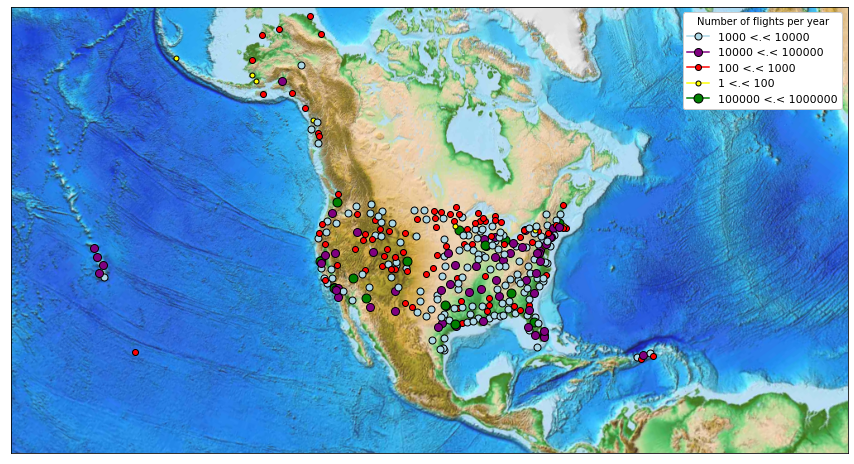

In [17]:
fig = plt.subplots(figsize=(15, 10))

count_to_fly = df["ORIGIN_AIRPORT"].value_counts()

labelsForFlights = []

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
for i in range(len(size_limits)-1):
    labelsForFlights.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 


land_To = Basemap(projection='lcc', resolution=None,
            width=15E6, height=8E6, 
            lat_0=45, lon_0=-100,)


for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = land_To(x, y)

    findPlaceAtLabel_To = [i for i, val in enumerate(size_limits) if val < count_to_fly[code]]
    ind_To = findPlaceAtLabel_To[-1]
    land_To.plot(x, y, marker='o', markersize = ind_To+5, markeredgewidth = 1, color = colors[ind_To],
             markeredgecolor='k', label = labelsForFlights[ind_To])

   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

new_label = dict()
for key in labels:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
land_To.etopo(scale=0.5, alpha=0.9)
plt.show()

Okey, its time do learn airlinel and their stats.

In [18]:
dataAir = df.groupby('AIRLINE')

meanFL = dataAir['DEPARTURE_DELAY'].mean().to_frame(name='mean delay')
minFL = dataAir['DEPARTURE_DELAY'].min().to_frame(name='min delay')
maxFL = dataAir['DEPARTURE_DELAY'].max().to_frame(name='max delay')
countFL = dataAir['DEPARTURE_DELAY'].count().to_frame(name='count flights')
timeFl = dataAir['AIR_TIME'].sum().to_frame(name='time flights')


mainStatsAboutAirlines = pd.concat([meanFL, minFL, maxFL, countFL, timeFl], axis=1)
mainStatsAboutAirlines


,mean delay,min delay,max delay,count flights,time flights
AIRLINE,,,,,
AA,9.275216,-68.0,1988.0,638313,89473152.0
AS,1.903827,-82.0,963.0,157268,24786823.0
B6,11.793915,-31.0,1006.0,240906,34637886.0
DL,7.739401,-61.0,1289.0,796418,92137719.0
EV,8.999556,-55.0,1236.0,511186,37151025.0
F9,14.218755,-46.0,1112.0,82142,10691374.0
HA,0.502569,-27.0,1433.0,69863,5931683.0
MQ,10.550461,-36.0,1278.0,257726,17292639.0
NK,16.635716,-37.0,836.0,105198,13905437.0


Make with that stats more visual.

Text(0, 0.5, 'Flights per year')

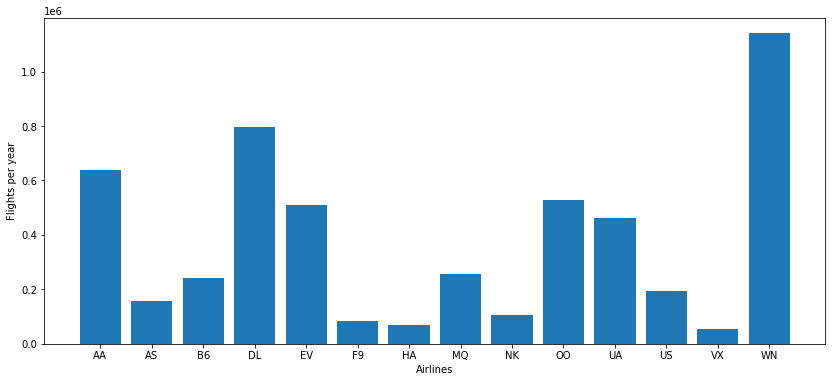

In [20]:
_, ax = plt.subplots(figsize=(14,6))
ax.bar(mainStatsAboutAirlines.index, mainStatsAboutAirlines['count flights'])
ax.set_xlabel("Airlines")
ax.set_ylabel("Flights per year")


In this pie I show proportion of flights of company.

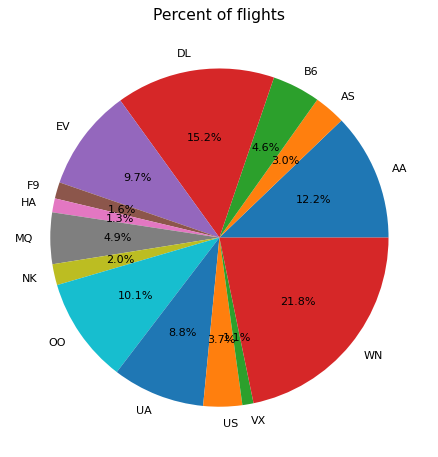

In [39]:
fig = plt.figure(figsize = (13,7), dpi=80)
fig.patch.set_facecolor('xkcd:white')

plt.pie(100*mainStatsAboutAirlines['count flights']/sum(mainStatsAboutAirlines['count flights']), labels=mainStatsAboutAirlines.index, autopct='%1.1f%%')
plt.title("Percent of flights", size=14)
plt.show()

Now i want to find the most loaded flight

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


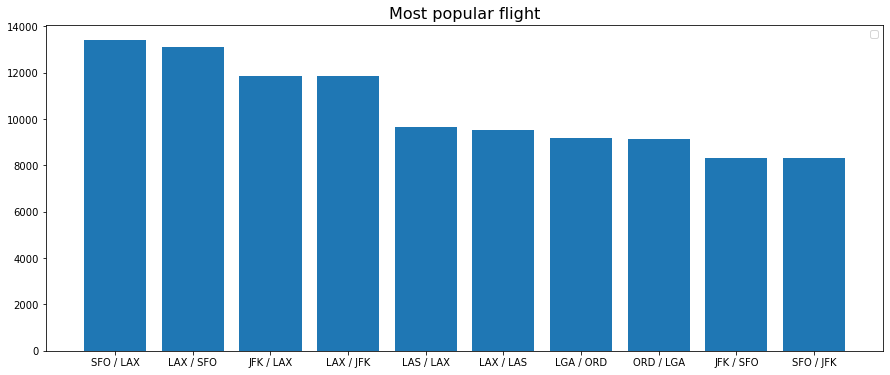

In [22]:
columnOfDestAndOrig = df['ORIGIN_AIRPORT'] + " / " + df['DESTINATION_AIRPORT']
temp = columnOfDestAndOrig.value_counts()[:10]


_, ax = plt.subplots(figsize=(15,6))
ax.bar(temp.index, temp)
ax.set_title("Most popular flight", fontsize=16)
ax.legend()


___________________________________________________________________________________________________________________________________________________

In [40]:
df["FLIGHT"] = df['ORIGIN_AIRPORT'] + " / " + df['DESTINATION_AIRPORT']

flight = df.groupby("FLIGHT")
mostDelay = flight["DEPARTURE_DELAY"].sum().sort_values()[:-11:-1]
mostDelay


FLIGHT
LAX / SFO    184218.0
SFO / LAX    168684.0
ORD / LGA    144130.0
ORD / SFO    140374.0
ORD / DFW    132196.0
ORD / LAX    132150.0
LAX / JFK    126978.0
LAS / SFO    124187.0
ORD / DEN    122915.0
LGA / ATL    117988.0
Name: DEPARTURE_DELAY, dtype: float64

In [24]:
flight["DEPARTURE_DELAY"].sum().sort_values()[:10]

FLIGHT
HNL / LIH   -8670.0
HNL / KOA   -7081.0
ITO / HNL   -5686.0
LIH / HNL   -5457.0
HNL / OGG   -5102.0
SNA / SEA   -4335.0
IDA / SLC   -3994.0
RDM / SLC   -3677.0
YAK / JNU   -3305.0
BUR / SEA   -3259.0
Name: DEPARTURE_DELAY, dtype: float64

This ster show us what propotion airlines in the most delaied flight.

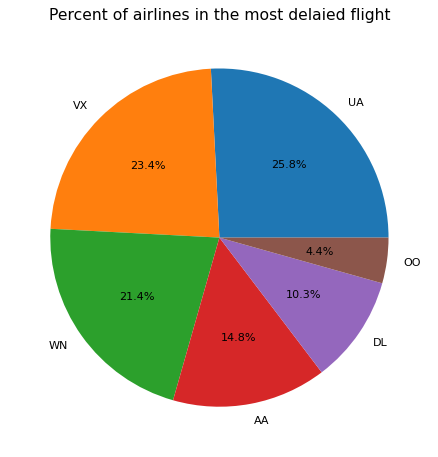

In [25]:
delaied = df.loc[df.FLIGHT == mostDelay.index[0], "AIRLINE"].value_counts()

fig = plt.figure(figsize = (13,7), dpi=80)
fig.patch.set_facecolor('xkcd:white')

plt.pie(100*delaied/sum(delaied), labels=delaied.index, autopct='%1.1f%%')
plt.title("Percent of airlines in the most delaied flight", size=14)
plt.show()

___________________________________________________________________________________________________________________________________________________

### PROBLEMS

Let find correlation with season of year and delayd

In [27]:
df["DATE"] = pd.to_datetime(df["DATE"])

Text(0, 0.5, 'Amount')

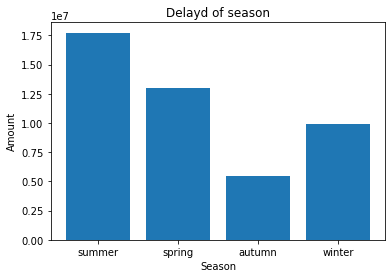

In [49]:
summer = df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31"), "DEPARTURE_DELAY"].sum()
spring = df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31"), "DEPARTURE_DELAY"].sum()
autumn = df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30"), "DEPARTURE_DELAY"].sum()
winter = df.loc[("2015-12-01" <= df['DATE']) | (("2015-01-01" <= df['DATE']) & (df['DATE'] <= "2015-01-31")), "DEPARTURE_DELAY"].sum()

_, ax = plt.subplots()
ax.bar(["summer", "spring", "autumn", "winter"], [summer, spring, autumn, winter])
ax.set_title("Delayd of season")
ax.set_xlabel("Season")
ax.set_ylabel("Amount")

Text(0, 0.5, 'Amount')

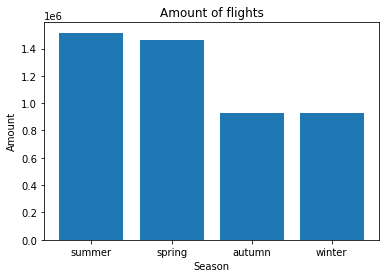

In [51]:
summer_len = len(df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31")])
spring_len = len(df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31")])
autumn_len = len(df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30")])
winter_len = len(df.loc[("2015-12-01" <= df['DATE']) | (("2015-01-01" <= df['DATE']) & (df['DATE'] <= "2015-01-31"))])

_, ax = plt.subplots()
ax.bar(["summer", "spring", "autumn", "winter"], [summer/summer_len, spring/spring_len, autumn/autumn_len, winter/winter_len])
ax.set_title("Amount of flights")
ax.set_xlabel("Season")
ax.set_ylabel("Amount")